<a href="https://colab.research.google.com/github/santhoshraj10/Predicting-Revenue-Generating-Customers-using-Google-Analytics-data/blob/main/capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/drive/MyDrive/Capstone/MyDrive/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Capstone')

Mounted at /content/drive/MyDrive/Capstone


In [ ]:
!kaggle competitions download -c ga-customer-revenue-prediction

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 84.1MB/s]
 99% 1.10G/1.11G [00:16<00:00, 56.8MB/s]
100% 1.11G/1.11G [00:16<00:00, 71.8MB/s]
 96% 5.00M/5.23M [00:00<00:00, 38.7MB/s]
100% 5.23M/5.23M [00:00<00:00, 32.9MB/s]
 72% 41.0M/56.8M [00:00<00:00, 31.0MB/s]
100% 56.8M/56.8M [00:01<00:00, 57.8MB/s]
 93% 57.0M/61.1M [00:00<00:00, 63.9MB/s]
100% 61.1M/61.1M [00:00<00:00, 76.7MB/s]
 99% 329M/333M [00:05<00:00, 60.0MB/s]
100% 333M/333M [00:05<00:00, 64.6MB/s]


In [ ]:
!unzip \train.csv.zip && rm train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
!unzip \test.csv.zip && rm test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [ ]:
import pandas as pd

In [ ]:
import numpy as np 
import pandas as pd 
import os
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time, date, timedelta


In [ ]:
def load_df(csv_path, nrows=None):
    '''
        csv_path --string-- path to data frame to read 
        returns: a dataFrame where Json columns are read correctly
    '''
    USE_COLUMNS = [
        'channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
        'socialEngagementType', 'totals', 'trafficSource', 'visitId',
        'visitNumber', 'visitStartTime', 'sessionId'
        #'hits'
    ]
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows, usecols=USE_COLUMNS)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [ ]:
train_df = load_df("train.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Loaded train.csv. Shape: (903653, 55)


In [ ]:
test_df = load_df("test.csv")

FileNotFoundError: ignored

In [ ]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

In [ ]:
test_df.columns

In [ ]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

In [ ]:
train_df["totals.transactionRevenue"].isna().sum()

892138

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device.browser                                     903653 non-null  object
 9   devi

In [ ]:
train_df.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [ ]:
print("The dataset consists of {} entries and {} features".format(train_df.shape[0], train_df.shape[1]))

The dataset consists of 903653 entries and 55 features


**Dataset Preprocessing**

In [ ]:
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns
obj_cols = list(set(cols) - set(num_cols))

In [ ]:
train_df["totals.transactionRevenue"].fillna(0,inplace=True)

In [ ]:
total_test = train_df[obj_cols].isnull().sum().sort_values(ascending=False)
percent = (train_df[obj_cols].isnull().sum()/train_df[obj_cols].isnull().count()).sort_values(ascending=False)*100
data_to_be_removed = pd.concat([total_test, percent], axis=1,join='outer', keys=['Missing Value Count', 'Percentage of Missing Values'])
data_to_be_removed.index.name ='Features'
data_to_be_removed

,Missing Value Count,Percentage of Missing Values
Features,,
trafficSource.campaignCode,903652,99.999889
trafficSource.adContent,892707,98.788694
trafficSource.adwordsClickInfo.isVideoAd,882193,97.625195
trafficSource.adwordsClickInfo.page,882193,97.625195
trafficSource.adwordsClickInfo.adNetworkType,882193,97.625195
trafficSource.adwordsClickInfo.slot,882193,97.625195
trafficSource.adwordsClickInfo.gclId,882092,97.614018
trafficSource.isTrueDirect,629648,69.678073
trafficSource.referralPath,572712,63.377425


Text(0.5, 1.0, 'Missing Values in Categorical Features')

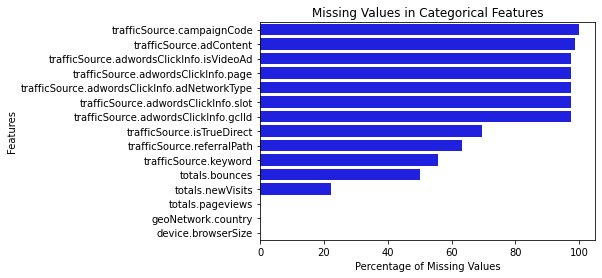

In [ ]:
sns.barplot(y = data_to_be_removed.index[:15],x = data_to_be_removed['Percentage of Missing Values'][:15],color='blue').set_title("Missing Values in Categorical Features")

In [ ]:
missing_cols = list(data_to_be_removed[data_to_be_removed['Percentage of Missing Values']>50.0].iloc[:,1].index)

In [ ]:

total_test1 = train_df[num_cols].isnull().sum().sort_values(ascending=False)
percent1 = (train_df[num_cols].isnull().sum()/train_df[num_cols].isnull().count()).sort_values(ascending=False)*100
data_to_be_removed1 = pd.concat([total_test1, percent1], axis=1,join='outer', keys=['Missing Value Count', 'Percentage of Missing Values'])
data_to_be_removed1.index.name ='Features'
data_to_be_removed1

,Missing Value Count,Percentage of Missing Values
Features,,
device.isMobile,0,0.0
visitStartTime,0,0.0
visitNumber,0,0.0
visitId,0,0.0
date,0,0.0


**Removing Categorical features with just 1 level**


In [ ]:
single_level_cols = [cols for cols in train_df[obj_cols].columns if train_df[cols].nunique(dropna=False)==1 ]
train_df.drop(single_level_cols,axis=1,inplace=True)
print(train_df.shape)

(903653, 36)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 36 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   channelGrouping                               903653 non-null  object
 1   date                                          903653 non-null  int64 
 2   fullVisitorId                                 903653 non-null  object
 3   sessionId                                     903653 non-null  object
 4   visitId                                       903653 non-null  int64 
 5   visitNumber                                   903653 non-null  int64 
 6   visitStartTime                                903653 non-null  int64 
 7   device.browser                                903653 non-null  object
 8   device.operatingSystem                        903653 non-null  object
 9   device.isMobile                               903653 non-nu

**EDA**

In [ ]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')

In [ ]:
rev_total=train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
nrc = rev_total[rev_total['totals.transactionRevenue']==0]
rc = rev_total[rev_total['totals.transactionRevenue']>0]
print("The number of nonrevenue customers are ", len(nrc))
print("The number of revenue generating customers are ", len(rc))
print("the ratio of revenue generating customers are {0:0.4}%".format(len(rc)/len(rev_total)*100))

The number of nonrevenue customers are  704171
The number of revenue generating customers are  9996
the ratio of revenue generating customers are 1.4%


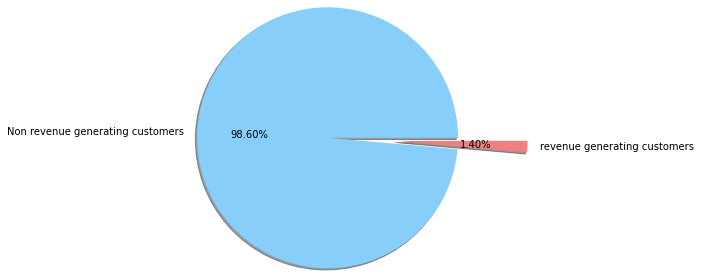

In [ ]:
labels = ['Non revenue generating customers','revenue generating customers']
values = [704171,9996]

plt.axis("equal")
plt.pie(values, labels=labels, radius=1.5, autopct="%0.2f%%",shadow=True, explode=[0,0.8], colors= ['lightskyblue','lightcoral'])
plt.show()

**Treat the date and hour columns**

In [ ]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,1,0.0,(not set),google,organic,google + online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,NaN,0.0,(not set),google,organic,(not provided),True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# library of datetime
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["_weekday"] = df['date'].dt.day_name()#extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting month
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df #returning the df after the transformations

In [ ]:
train_df = date_process(train_df)

**Exploring Date fields**

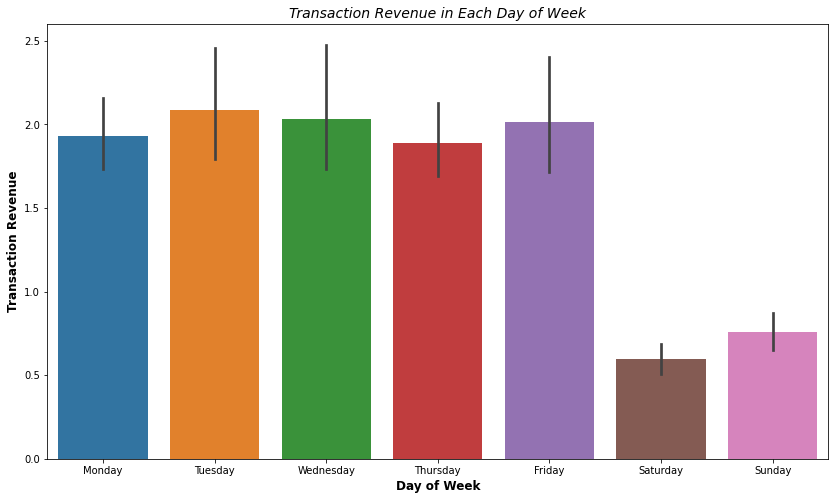

In [ ]:
# Define order of day for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14,8))
sns.barplot(x=train_df['_weekday'], y=(train_df['totals.transactionRevenue']/ 10**6), data=train_df,order = day_order)
plt.title("Transaction Revenue in Each Day of Week", fontsize = 14, style = 'italic')
plt.xlabel("Day of Week", fontsize = 12, weight = 'bold')
plt.ylabel("Transaction Revenue", fontsize = 12, weight = 'bold')
plt.show()

On weekdays we can expect more sales
On weekends sales are less

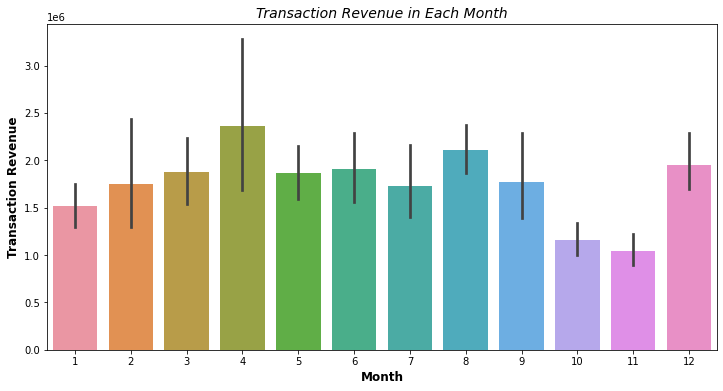

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_df["_month"],y=train_df['totals.transactionRevenue'])
plt.title("Transaction Revenue in Each Month", fontsize = 14, style = 'italic')
plt.xlabel("Month", fontsize = 12, weight = 'bold')
plt.ylabel("Transaction Revenue", fontsize = 12, weight = 'bold')
plt.show()

**Revenue peak on April**

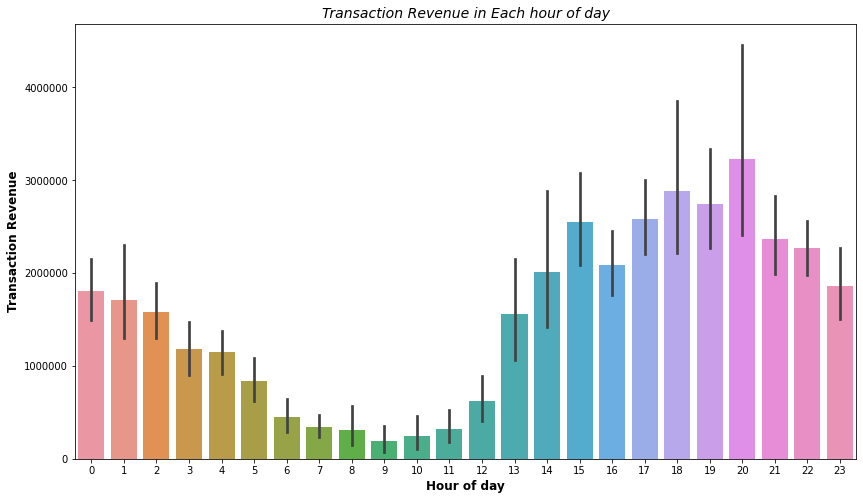

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data = train_df,
            x = '_visitHour',
            y = train_df['totals.transactionRevenue'])
plt.title("Transaction Revenue in Each hour of day", fontsize = 14, style = 'italic')
plt.xlabel("Hour of day", fontsize = 12, weight = 'bold')
plt.ylabel("Transaction Revenue", fontsize = 12, weight = 'bold')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Afternoon 2pm to night 11pm ,revenue generation is high
Most revenue gain by visit in 20:00 (8:00pm)

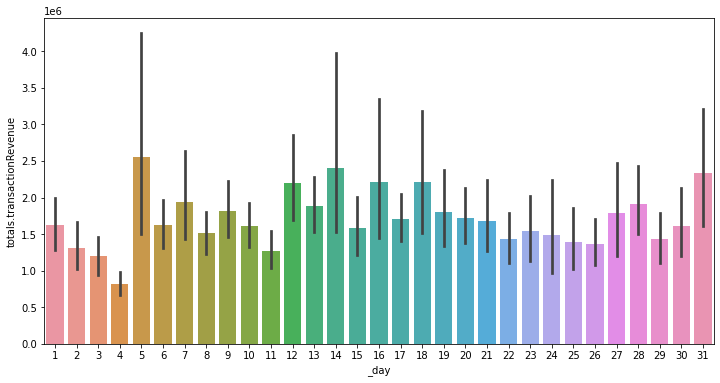

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_df['_day'], y=train_df['totals.transactionRevenue'], data=train_df)
plt.show()

**What device visitor use to visit Gstore**

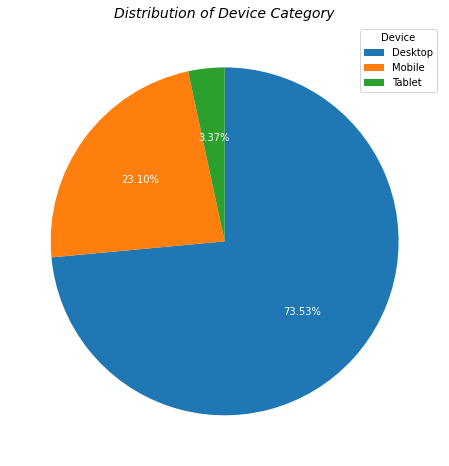

In [ ]:
device = train_df['device.deviceCategory'].value_counts()
plt.figure(figsize=[14,8])
plt.pie(device, labels = device.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(['Desktop', 'Mobile', 'Tablet'],
           title='Device', 
           loc='upper right')
plt.title('Distribution of Device Category', fontsize = 14,  style ='italic');

In [ ]:
visitFreq_agg =train_df.groupby('fullVisitorId').agg(frequency = ('fullVisitorId', 'count') , 
                                                      transactions = ('totals.transactionRevenue', 'sum'))
visitFreq_agg['visitRange'] =pd.cut(visitFreq_agg['frequency'], [-1, 1, 2, 3, 6, 10, 20, 40, 80, 400],
                                     labels = ['1', '2', '3', '4-6', '7-10', '11-20', '21-40', '41-80', '81-400'])
visitFreq_agg =visitFreq_agg.groupby('visitRange').agg(visit_frequency = ('frequency','count'),
                                        Total_revenue =('transactions','sum'))
visitFreq_agg["Total_revenue"]=visitFreq_agg["Total_revenue"]/10**6
visitFreq_agg['frequency_%'] = (visitFreq_agg['visit_frequency']/sum(visitFreq_agg['visit_frequency'])).map("{:.2%}".format)
visitFreq_agg['Revenue%'] = (visitFreq_agg['Total_revenue']/sum(visitFreq_agg['Total_revenue'])).map("{:.2%}".format)

In [ ]:
visitFreq_agg

,visit_frequency,Total_revenue,frequency_%,Revenue%
visitRange,,,,
1,620675,237084.23,86.91%,15.39%
2,58711,216987.94,8.22%,14.09%
3,17159,179655.30,2.40%,11.67%
4-6,13098,339408.88,1.83%,22.04%
7-10,2991,194089.12,0.42%,12.60%
11-20,1183,175814.36,0.17%,11.42%
21-40,266,108663.31,0.04%,7.06%
41-80,59,5484.42,0.01%,0.36%
81-400,25,82883.68,0.00%,5.38%


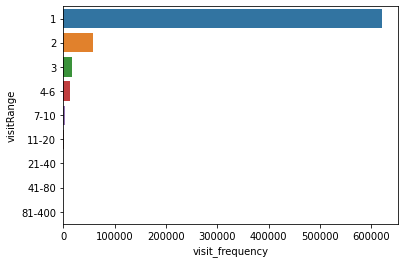

In [ ]:
sns.barplot(x=visitFreq_agg["visit_frequency"], y=visitFreq_agg.index, data=visitFreq_agg)
plt.show()

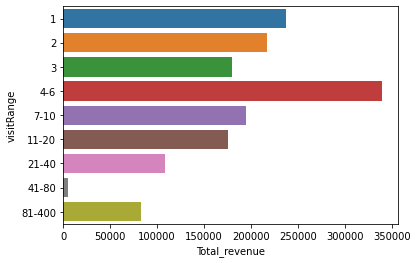

In [ ]:
sns.barplot(x=visitFreq_agg["Total_revenue"], y=visitFreq_agg.index, data=visitFreq_agg)
plt.show()

Most visitors (86.91%) only visit the website once
For the visitors that visit the site for 4 - 6 times, they are the highest revenue generating group, \ although they only account for 1.83% of total visitors, they contribute 22.04% of the total revenue (buying)

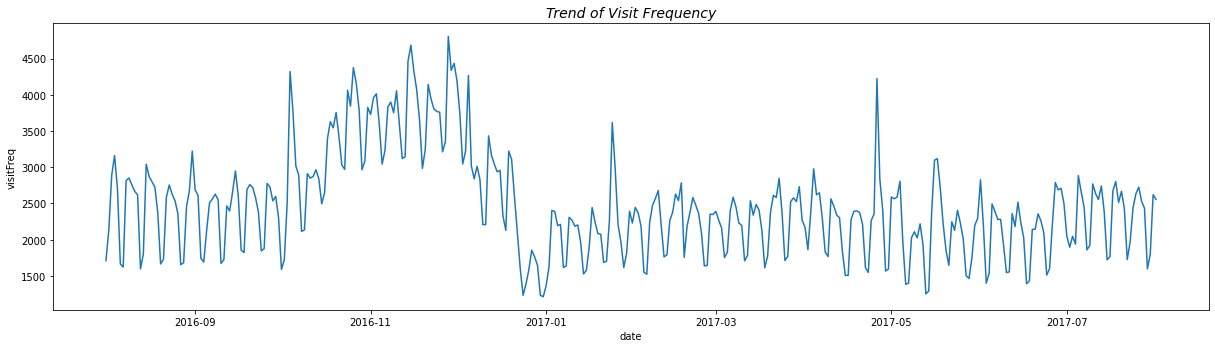

In [ ]:
gdata=train_df.groupby('date').agg(visitFreq = ('fullVisitorId', 'count'))
fig, ax =  plt.subplots(1, 1, figsize = (20.70, 5.27))

sns.lineplot(x="date", y="visitFreq", data=gdata)

ax.set_title('Trend of Visit Frequency', fontsize = 14, style = 'italic');

Text(0.5, 1.0, 'Trend of Visit Frequency')

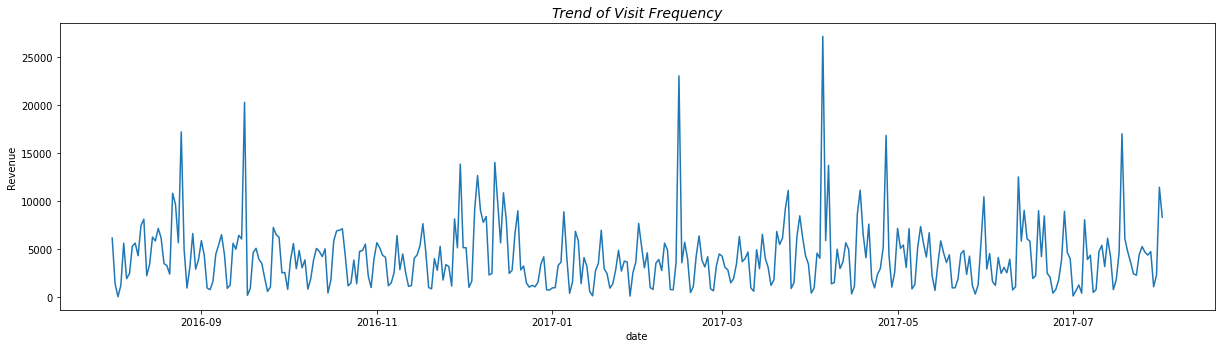

In [ ]:
GData=train_df.groupby('date').agg(visitFreq = ('fullVisitorId', 'count'),Revenue = ('totals.transactionRevenue', 'sum'))
GData["Revenue"]=GData["Revenue"]/10**6
## Graph for sum of Revenue (buying)
fig, ax =  plt.subplots(1, 1, figsize = (20.70, 5.27))
sns.lineplot(x="date", y="Revenue", data=GData)
ax.set_title('Trend of Visit Frequency', fontsize = 14, style = 'italic')


Data Finding: From 2016-10 to 2016-12, there was a period of significant increase in distinct number of visitors but not for the sum of transaction revenue. This could be possibly caused by an unsuccessful marketing compaign that brought in lots of visitors but low conversion rates or there was a surge of spam clicks/visitors.

**Exploring Geonetwork category**

In [ ]:
country = train_df.groupby('geoNetwork.country').agg(visitFreq = ('fullVisitorId', 'count'),
                                                     Total_revenue =('totals.transactionRevenue','sum'))
country["Total_revenue"]=country["Total_revenue"]/10**6
country['visit_Freq%'] = (country['visitFreq']/sum(country['visitFreq'])).map("{:.2%}".format)
country['Revenue%%'] = (country['Total_revenue']/sum(country['Total_revenue'])).map("{:.2%}".format)

country = country[['visitFreq','visit_Freq%','Total_revenue','Revenue%%']]
country=country.sort_values(by=['visitFreq'],ascending = False).head(10)
country

,visitFreq,visit_Freq%,Total_revenue,Revenue%%
geoNetwork.country,,,,
United States,364744,40.36%,1452440.65,94.31%
India,51140,5.66%,696.66,0.05%
United Kingdom,37393,4.14%,1689.45,0.11%
Canada,25869,2.86%,32824.54,2.13%
Vietnam,24598,2.72%,0.00,0.00%
Turkey,20522,2.27%,102.41,0.01%
Thailand,20123,2.23%,462.71,0.03%
Germany,19980,2.21%,549.34,0.04%
Brazil,19783,2.19%,641.83,0.04%


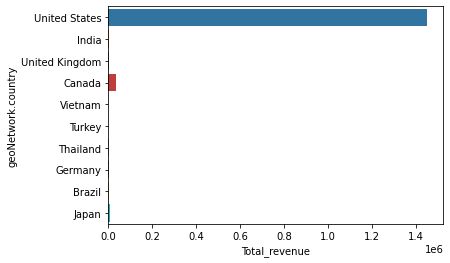

In [ ]:
sns.barplot(x=country["Total_revenue"].head(10), y=country.index[:10], data=country)
plt.show()

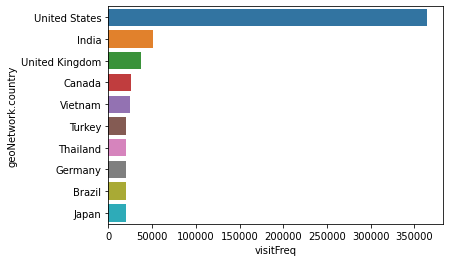

In [ ]:
sns.barplot(x=country["visitFreq"].head(10), y=country.index[:10], data=country)
plt.show()

Most of the visits comes from united states, and nearly 95% of the Revenue comes from United States

Except United States other subcontinents has countable number of revenue generating customers
United States is the clear winner in generating revenue generation

**Which part of the United State?**

In [ ]:
city = train_df.groupby('geoNetwork.city').agg(visitFreq = ('fullVisitorId', 'count'),
                                                     Total_revenue =('totals.transactionRevenue','sum'))
city["Total_revenue"]=city["Total_revenue"]/10**6
city['visit_Freq%'] = (city['visitFreq']/sum(city['visitFreq'])).map("{:.2%}".format)
city['Revenue%%'] = (city['Total_revenue']/sum(city['Total_revenue'])).map("{:.2%}".format)

city = city[['visitFreq','visit_Freq%','Total_revenue','Revenue%%']]
city=city.sort_values(by=['visitFreq'],ascending = False).head(10)
city.drop(["not available in demo dataset","(not set)"],0,inplace=True)
city

,visitFreq,visit_Freq%,Total_revenue,Revenue%%
geoNetwork.city,,,,
Mountain View,40884,4.52%,126103.68,8.19%
New York,26371,2.92%,220143.51,14.29%
San Francisco,20329,2.25%,100873.96,6.55%
Sunnyvale,13086,1.45%,39393.58,2.56%
London,12607,1.40%,1460.00,0.09%
San Jose,10295,1.14%,18729.18,1.22%
Los Angeles,8670,0.96%,41896.33,2.72%
Bangkok,7709,0.85%,164.92,0.01%


Interesting info: Mountain View,Sunnyvale,San Francisco and San Jose are cities loacted inside silicon valley, together they account for 9.3% of the total visit and 18.52% of the total revenue (buying) of Gstore

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 41 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   channelGrouping                               903653 non-null  object        
 1   date                                          903653 non-null  datetime64[ns]
 2   fullVisitorId                                 903653 non-null  object        
 3   sessionId                                     903653 non-null  object        
 4   visitId                                       903653 non-null  int64         
 5   visitNumber                                   903653 non-null  int64         
 6   visitStartTime                                903653 non-null  int64         
 7   device.browser                                903653 non-null  object        
 8   device.operatingSystem                        903653 n

In [ ]:
traffic=train_df.groupby('trafficSource.source').agg(visitFreq = ('fullVisitorId', 'count'),
                                                     Total_revenue =('totals.transactionRevenue','sum'))
traffic["Total_revenue"]=traffic["Total_revenue"]/10**6
traffic['visit_Freq%'] = (traffic['visitFreq']/sum(traffic['visitFreq'])).map("{:.2%}".format)
traffic['Revenue%%'] = (traffic['Total_revenue']/sum(traffic['Total_revenue'])).map("{:.2%}".format)

traffic = traffic[['visitFreq','visit_Freq%','Total_revenue','Revenue%%']]
traffic=traffic.sort_values(by=['Total_revenue'],ascending = False).head(10)

In [ ]:
traffic

,visitFreq,visit_Freq%,Total_revenue,Revenue%%
trafficSource.source,,,,
mall.googleplex.com,66416,7.35%,612968.03,39.80%
(direct),143028,15.83%,434840.55,28.24%
google,400788,44.35%,368965.36,23.96%
dfa,5686,0.63%,76928.42,5.00%
mail.google.com,1457,0.16%,23327.91,1.51%
dealspotr.com,528,0.06%,5690.64,0.37%
sites.google.com,2983,0.33%,4390.78,0.29%
gdeals.googleplex.com,1063,0.12%,2175.54,0.14%
groups.google.com,1025,0.11%,1631.26,0.11%


In [ ]:
traffic1=traffic.sort_values(by=['visitFreq'],ascending = False).head(10)

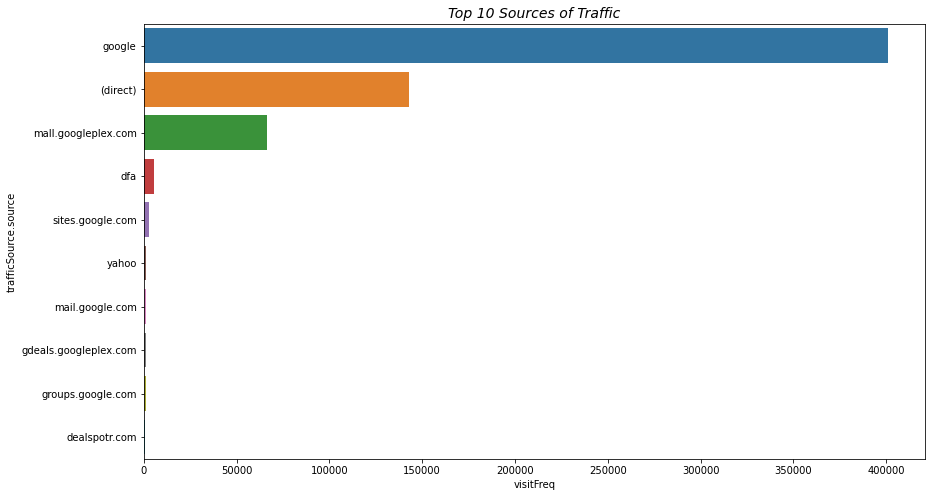

In [ ]:
plt.figure(figsize=[14,8])
sns.barplot(x=traffic1["visitFreq"], y=traffic1.index, data=traffic1)
plt.title('Top 10 Sources of Traffic', fontsize = 14,  style ='italic')
plt.show()

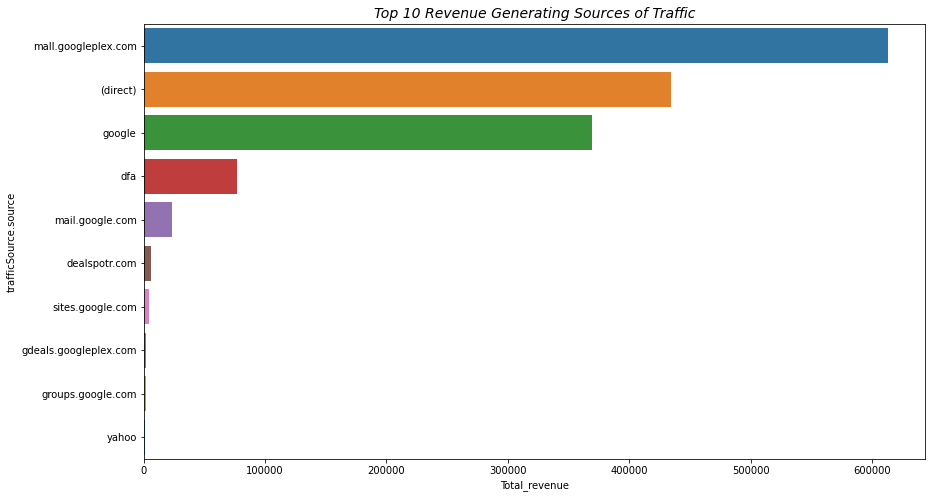

In [ ]:
plt.figure(figsize=[14,8])
sns.barplot(x=traffic["Total_revenue"], y=traffic.index, data=traffic)
plt.title('Top 10 Revenue Generating Sources of Traffic', fontsize = 14,  style ='italic')
plt.show()

**Info we get from exploratory analysis**

Most of the visitors (99%) only view and not buy.

Main customer of the sites come from United State, and the biggest group comes from silicon valley (where the company of google located) and newyork.

Most buying occured on weekdays and visit time after 5:00pm, possibly after the closing hours of office.

The April and Dec months are hot season the sites been visited and buying occured \ (maybe due to gifts of easter day (April) and Chrismas (December)?)

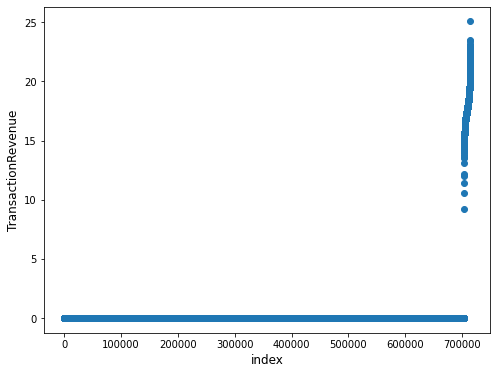

In [ ]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
tt = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(tt.shape[0]), np.sort(np.log1p(tt["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

**Generating our target variable of interest : Flag indicating if a customer is a revenue generating customer or not**

In [ ]:
group_cols = ['fullVisitorId']
counted = 'totals.transactionRevenue'
agg_name = 'totals.transactionRevenue_sum'
gp = train_df[group_cols+[counted]].groupby(group_cols)[counted].sum().reset_index().rename(columns={counted:agg_name})

In [ ]:
gp['Revenue_Generating_Flag'] = np.where(gp['totals.transactionRevenue_sum']>0,1,0)
cols = ['fullVisitorId','Revenue_Generating_Flag']

In [ ]:
train_df1 = pd.merge(train_df,gp[cols],on='fullVisitorId',how='inner')

In [ ]:
train_df1.Revenue_Generating_Flag.value_counts()

0    867543
1     36110
Name: Revenue_Generating_Flag, dtype: int64